<a href="https://colab.research.google.com/github/dwd54/AI100-Midterm-Project---Drake-Davies/blob/main/AI100_Midterm_Drake_Davies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Label example (0=negative, 1=positive): {y_train[0]}")

# Decode and print an example review
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
print(f"\nExample review:\n{decoded_review}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Label example (0=negative, 1=positive): 1
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Example review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left o

In [3]:
# Pad sequences so they're all the same length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [4]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5694 - loss: 0.6911 - val_accuracy: 0.7054 - val_loss: 0.6789
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7038 - loss: 0.6725 - val_accuracy: 0.7618 - val_loss: 0.6452
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7768 - loss: 0.6318 - val_accuracy: 0.7618 - val_loss: 0.5879
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7894 - loss: 0.5659 - val_accuracy: 0.7972 - val_loss: 0.5168
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8206 - loss: 0.4942 - val_accuracy: 0.8162 - val_loss: 0.4593
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8416 - loss: 0.4323 - val_accuracy: 0.8460 - val_loss: 0.4088
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8640 - loss: 0.3805 - val_accuracy: 0.8560 - val_loss: 0.3748
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8679 - loss: 0.3505 - val_accuracy: 0.8574 - v

In [6]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 0.8633
Test Loss: 0.3289


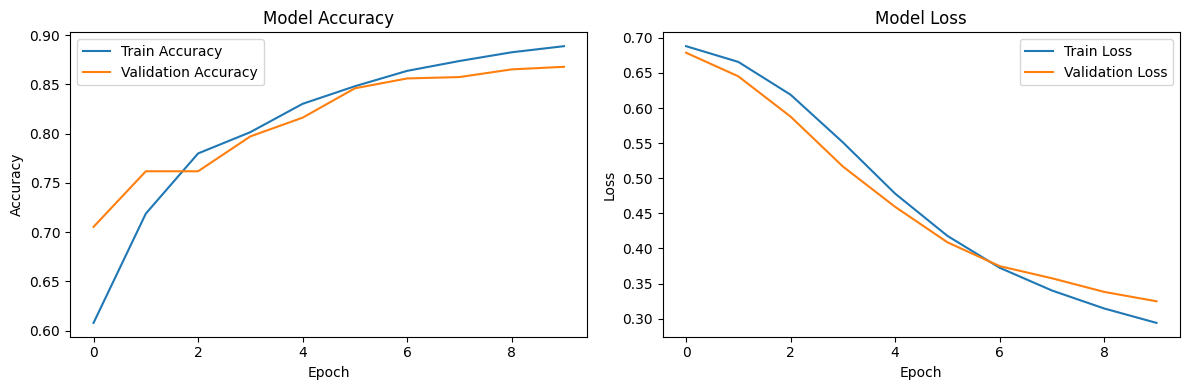

In [7]:
# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_curves.png')
plt.show()

In [8]:
def predict_sentiment(review_text):
    words = review_text.lower().split()
    word_index = imdb.get_word_index()
    encoded = [word_index.get(w, 2) + 3 for w in words]
    padded = pad_sequences([encoded], maxlen=maxlen)
    prediction = model.predict(padded)[0][0]
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😞"
    print(f"Review: {review_text}")
    print(f"Sentiment: {sentiment} (score: {prediction:.4f})")

# Try it out!
predict_sentiment("This movie was absolutely fantastic, I loved every moment of it")
predict_sentiment("This film was terrible and boring, a complete waste of time")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Review: This movie was absolutely fantastic, I loved every moment of it
Sentiment: Positive 😊 (score: 0.7020)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Review: This film was terrible and boring, a complete waste of time
Sentiment: Negative 😞 (score: 0.3870)
